# Customer Analysis #
**Regression Model** 
<br>
*Data on the customers of a car insurance company*
<br>
*Goal is to predict total claim amount*

In [3]:
# Lab 4.01

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [67]:
customer_df = pd.read_csv('lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [68]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
def col_names (data):
    """standardizes columns names: lowercase, removes spaces 
    at the beginning and at the end, replaces spaces with underscore"""
    cols = data.columns
    new_cols =[]
    for col in cols:
        new_col = col.lower().strip().replace(" ", "_")
        new_cols.append(new_col)
    data.columns = new_cols
    return

col_names(customer_df)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
customer_df.shape

(9134, 24)

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [9]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
for i in customer_df.columns:
    print (i,":",len(customer_df[i].unique()))

customer : 9134
state : 5
customer_lifetime_value : 8041
response : 2
coverage : 3
education : 5
effective_to_date : 59
employmentstatus : 5
gender : 2
income : 5694
location_code : 3
marital_status : 3
monthly_premium_auto : 202
months_since_last_claim : 36
months_since_policy_inception : 100
number_of_open_complaints : 6
number_of_policies : 9
policy_type : 3
policy : 9
renew_offer_type : 4
sales_channel : 4
total_claim_amount : 5106
vehicle_class : 6
vehicle_size : 3


In [11]:
# for i in customer_df:
#     print(customer_df[i].value_counts())

In [12]:
def num_cat_split(df):
    global num
    global cat
    num = pd.DataFrame()
    cat = pd.DataFrame()
    for i in df.columns:
        if len(df[i].unique()) > 10:
            num[i] = df[i]
        else:
            cat[i] = df[i]

In [13]:
num_cat_split(customer_df)

In [14]:
num.head()

,customer,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,BU79786,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,QZ44356,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,AI49188,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,WW63253,7645.861827,2011-01-20,0,106,18,65,529.881344
4,HB64268,2813.692575,2011-02-03,43836,73,12,44,138.130879


In [15]:
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [16]:
num.dtypes

customer                                 object
customer_lifetime_value                 float64
effective_to_date                datetime64[ns]
income                                    int64
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
total_claim_amount                      float64
dtype: object

In [17]:
num = num.drop((['customer']), axis = 1)

In [18]:
num.dtypes

customer_lifetime_value                 float64
effective_to_date                datetime64[ns]
income                                    int64
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
total_claim_amount                      float64
dtype: object

In [19]:
cat.dtypes

state                        object
response                     object
coverage                     object
education                    object
employmentstatus             object
gender                       object
location_code                object
marital_status               object
number_of_open_complaints     int64
number_of_policies            int64
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

In [20]:
# Lab 4.02

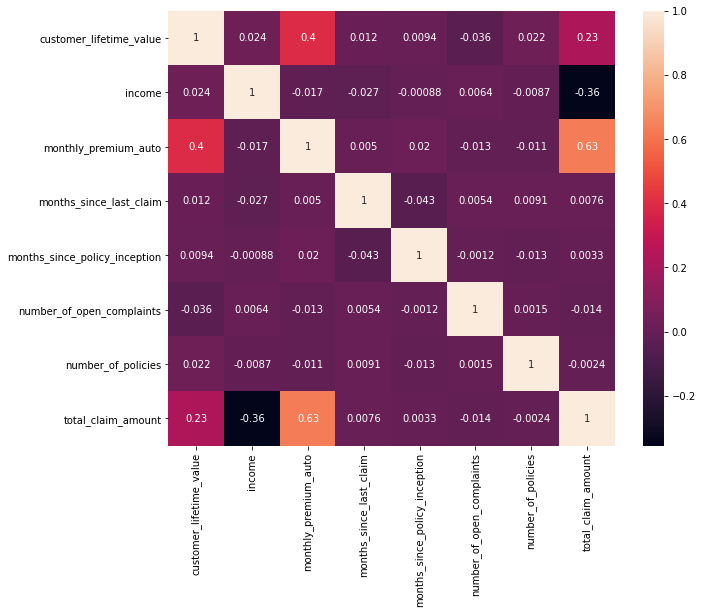

In [21]:
corr_matrix=customer_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)  # annot true is to show coefficients
plt.show()

In [22]:
# distribution

In [31]:
def plot_cat2(df):
    for i in range(df.shape[1]):
        sns.barplot(x = df[df.columns[i]].value_counts().index, y = df[df.columns[i]].value_counts())
        plt.show()

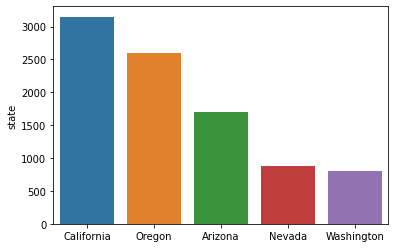

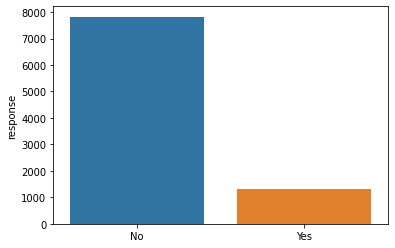

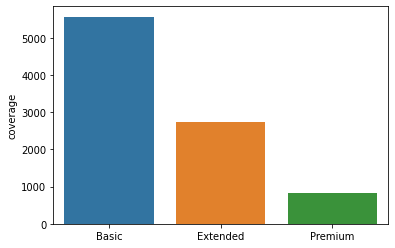

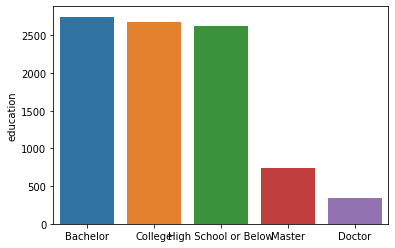

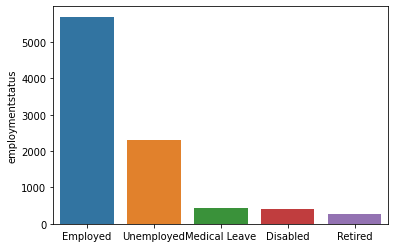

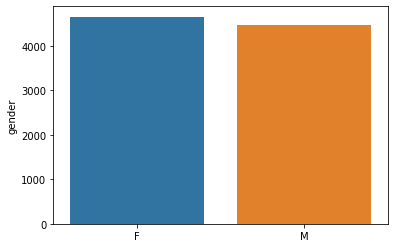

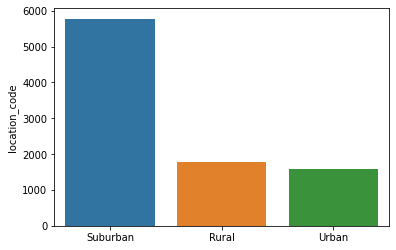

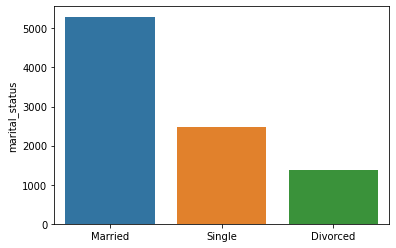

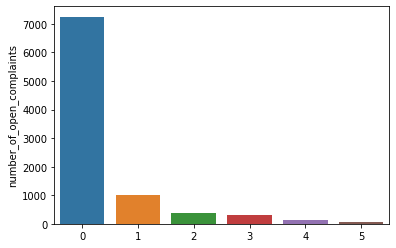

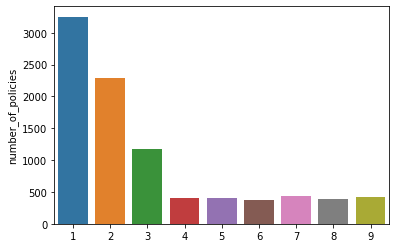

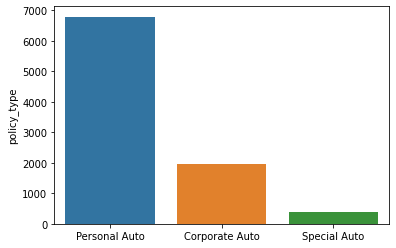

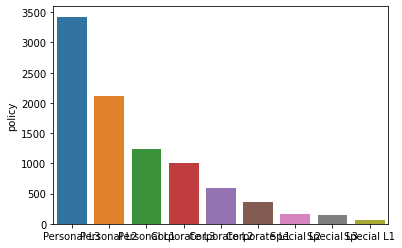

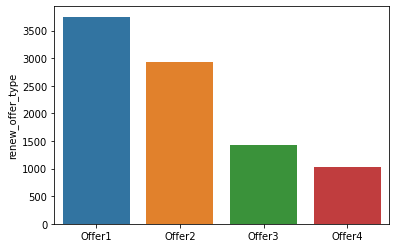

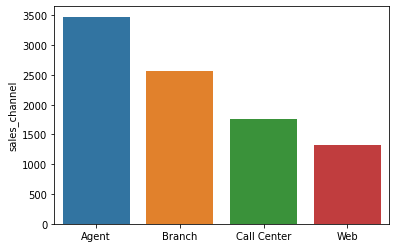

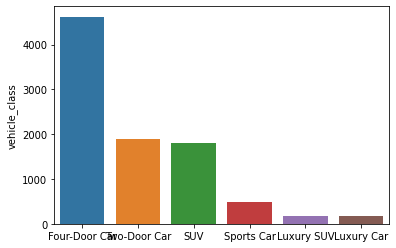

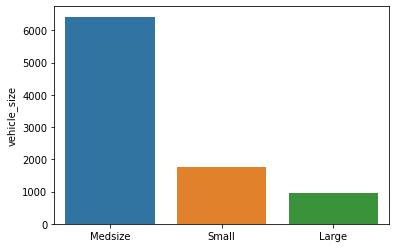

In [32]:
plot_cat2(cat)

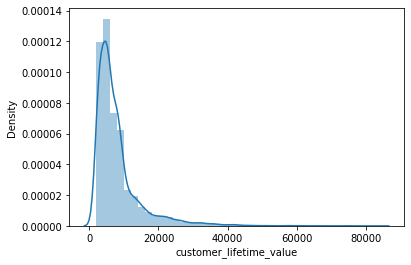

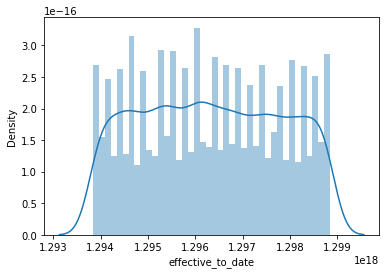

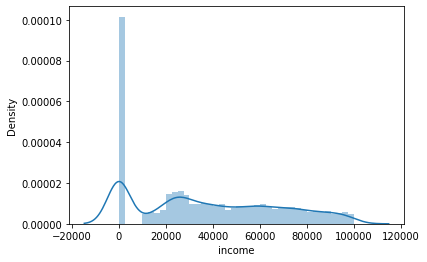

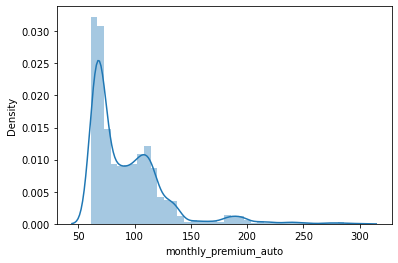

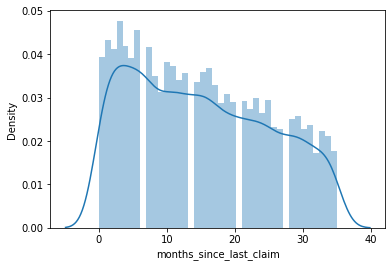

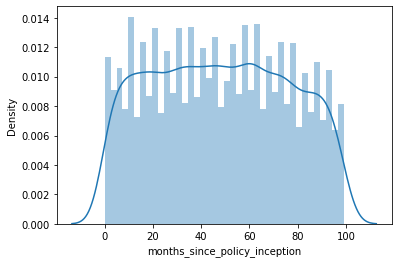

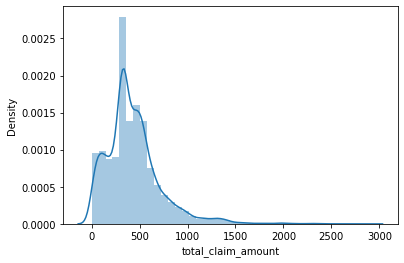

In [45]:
def plot_num(df):
    for i in range(df.shape[1]):
        sns.distplot(df[df.columns[i]], bins=40)
        plt.show()
        
plot_num(num)

In [46]:
# outliers

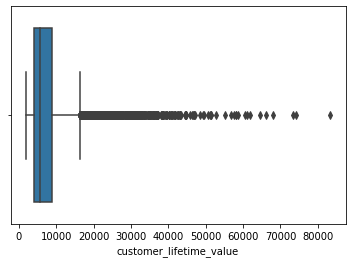

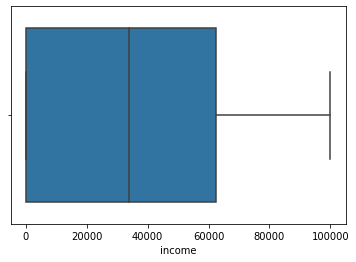

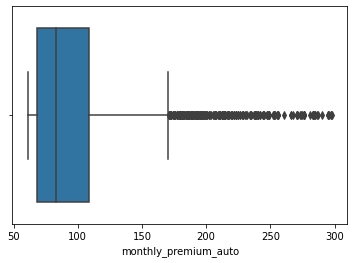

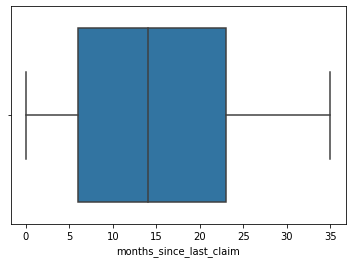

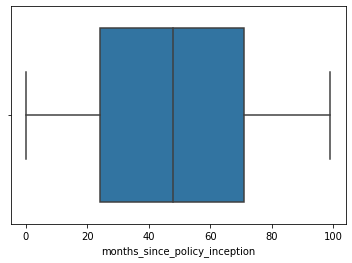

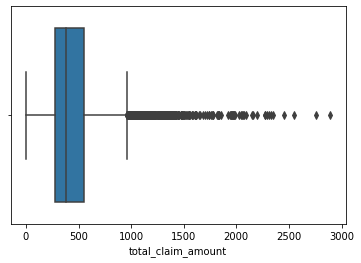

In [47]:
num_ = num.drop((['effective_to_date']), axis = 1)
for i in range(num_.shape[1]):
    sns.boxplot(num_[num_.columns[i]])
    plt.show()

In [48]:
iqr = np.percentile(num['customer_lifetime_value'],75) - np.percentile(num['customer_lifetime_value'],25)
upper_limit = np.percentile(num['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(num['customer_lifetime_value'],25) - 1.5*iqr

num_copy = num[(num['customer_lifetime_value']>lower_limit) & (num['customer_lifetime_value']<upper_limit)]

num_copy.shape[0] - num.shape[0]

-817

In [49]:
# removing outliers will remove 10% of the observations. not a good idea
# do a transformation

In [62]:
def log_transform_clean(x):
    if np.isfinite(x) and x>0:
        return np.log(x)
    else:
        return np.NaN 
    
def sqrt_transform_clean(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [64]:
def log_transf_cols(df, collist):
    
    for x in collist:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,5))
        plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
        new_name = x + "_log"
        df[new_name] = list(map(log_transform_clean, num_[x]))
        sns.histplot(df[x], ax=ax1)
        sns.histplot(df[new_name], ax=ax2)
        plt.show()

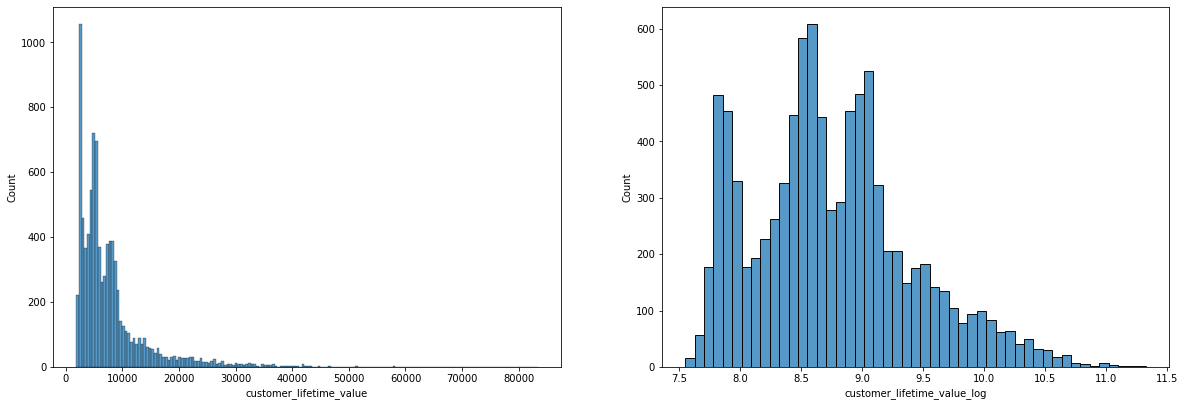

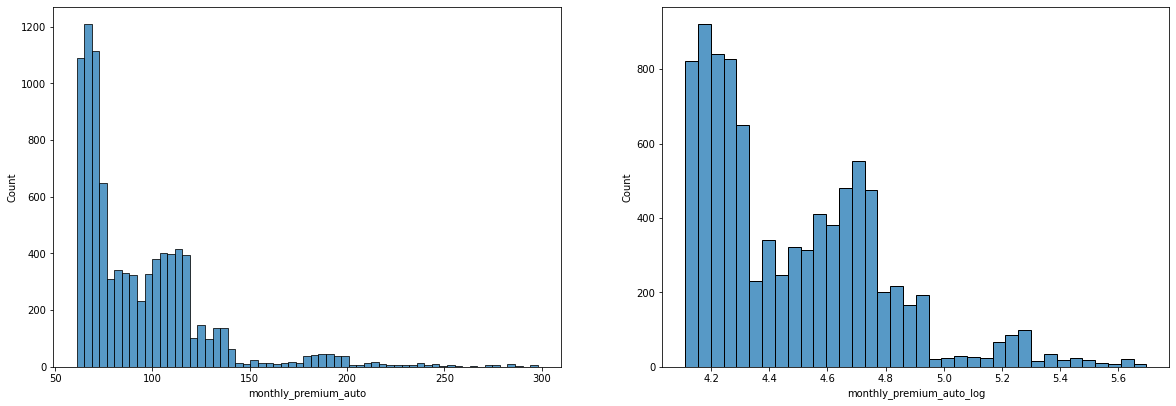

In [66]:
num_ = num.drop(['effective_to_date'], axis=1)
lst=['customer_lifetime_value', 'monthly_premium_auto']

log_transf_cols(num_, lst)

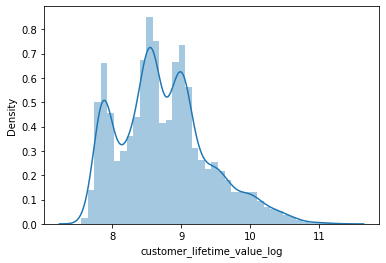

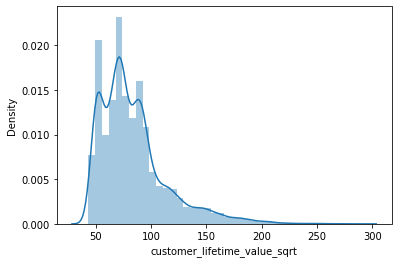

In [58]:
num['customer_lifetime_value_log'] = num['customer_lifetime_value'].apply(log_transform_clean)
num['customer_lifetime_value_sqrt'] = num['customer_lifetime_value'].apply(sqrt_transform_clean)

sns.distplot(num['customer_lifetime_value_log'], bins=40)
plt.show()

sns.distplot(num['customer_lifetime_value_sqrt'], bins=40)
plt.show()

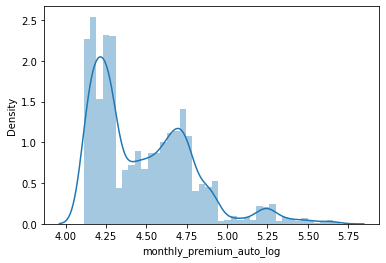

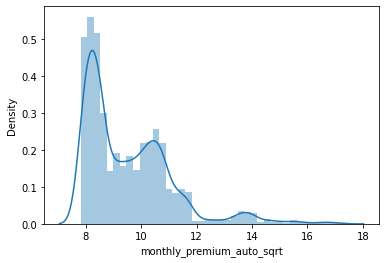

In [123]:
num['monthly_premium_auto_log'] = num['monthly_premium_auto'].apply(log_transfom_clean)
num['monthly_premium_auto_sqrt'] = num['monthly_premium_auto'].apply(sqrt_transfom_clean)

sns.distplot(num['monthly_premium_auto_log'], bins=40)
plt.show()

sns.distplot(num['monthly_premium_auto_sqrt'], bins=40)
plt.show()

In [124]:
num = num.drop(
    (['monthly_premium_auto', 'monthly_premium_auto_sqrt', 
      'customer_lifetime_value', 'customer_lifetime_value_sqrt']), 
    axis = 1, errors = 'ignore'
    )

In [125]:
# replace the NaNs after the log transformation
# remove outliers after the transformation if needed (do that on the total df, not on num)

In [126]:
num.isna().sum()

effective_to_date                0
income                           0
months_since_last_claim          0
months_since_policy_inception    0
total_claim_amount               0
customer_lifetime_value_log      0
monthly_premium_auto_log         0
dtype: int64

In [127]:
# Lab 4.03

In [128]:
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


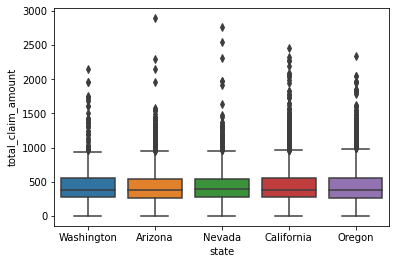

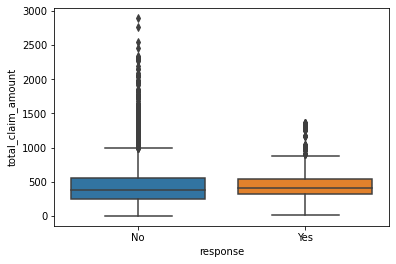

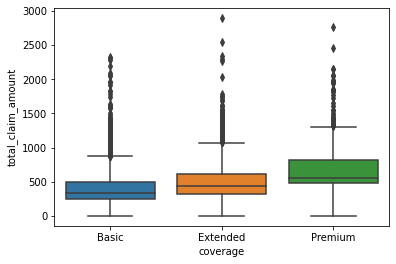

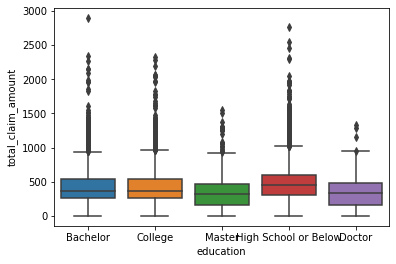

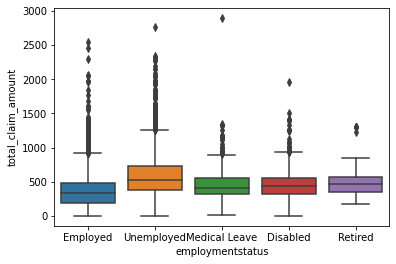

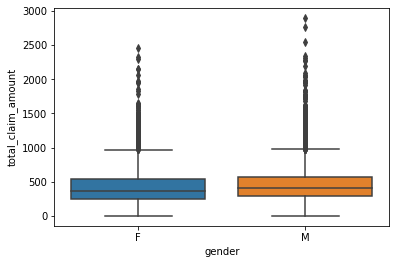

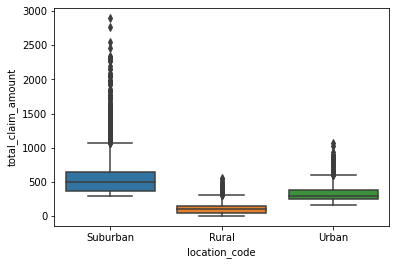

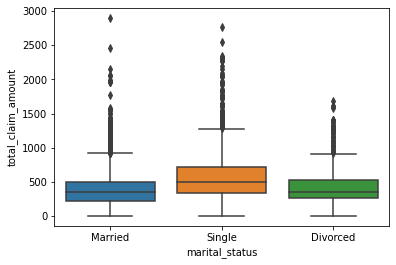

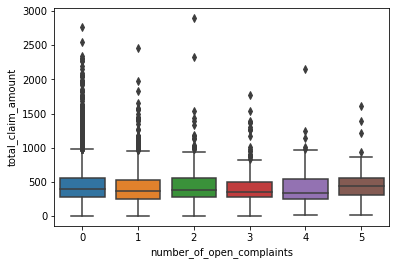

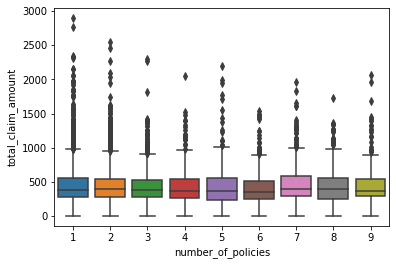

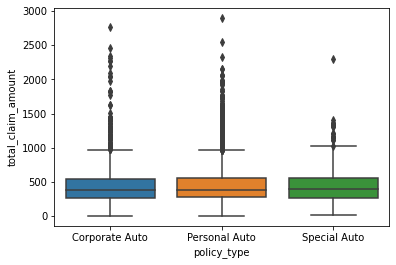

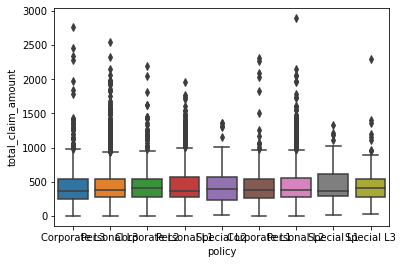

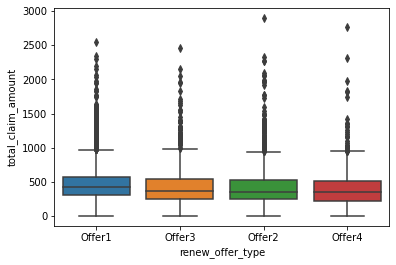

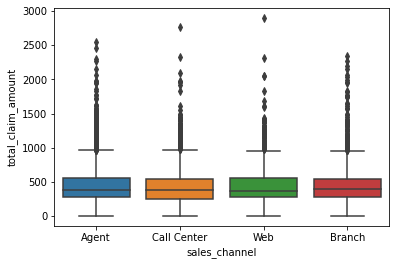

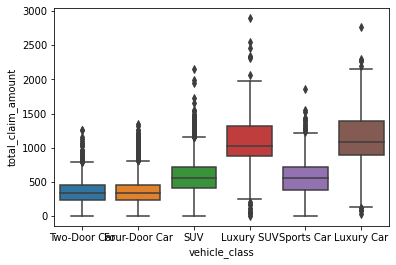

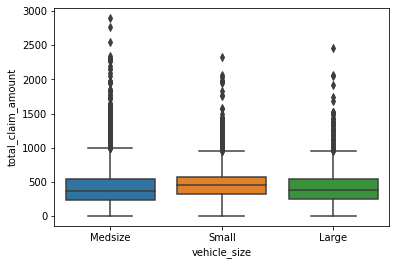

In [129]:
for i in cat.columns:
    sns.boxplot(x=cat[i], y=num['total_claim_amount'], data = customer_df)
    plt.show()

In [130]:
corporate = customer_df[(customer_df['policy_type'] == 'Corporate Auto')]
print(corporate['policy'].unique())

personal = customer_df[(customer_df['policy_type'] == 'Personal Auto')]
print(personal['policy'].unique())

special = customer_df[(customer_df['policy_type'] == 'Special Auto')]
print(special['policy'].unique())

['Corporate L3' 'Corporate L2' 'Corporate L1']
['Personal L3' 'Personal L1' 'Personal L2']
['Special L2' 'Special L1' 'Special L3']


In [131]:
cat = cat.drop((['policy']), axis = 1)

In [132]:
# feature engineering on the effective_to_date column

# num['effective_to_week'] = num['effective_to_date'].dt.isocalendar().week

In [133]:
num.head()

,effective_to_date,income,months_since_last_claim,months_since_policy_inception,total_claim_amount,customer_lifetime_value_log,monthly_premium_auto_log
0,2011-02-24,56274,32,5,384.811147,7.924260,4.234107
1,2011-01-31,0,13,42,1131.464935,8.850738,4.543295
2,2011-02-19,48767,18,38,566.472247,9.464008,4.682131
3,2011-01-20,0,18,65,529.881344,8.941920,4.663439
4,2011-02-03,43836,12,44,138.130879,7.942253,4.290459


In [134]:
num['effective_to_date'].value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161
2011-02-10    161
2011-01-21    160
2011-01-29    160
2011-01-02    160
2011-02-03    158
2011-02-22    158
2011-02-05    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-01-18    154
2011-02-01    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-25    151
2011-01-07    151
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-02-25    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-02-23    143
2011-01-06    143
2011-01-16    142
2011-02-13    139
2011-02-16    139
2011-02-24    139
2011-02-09    137
2011-01-22    136
2011-02-17    136
2011-02-08    134
2011-02-20

In [135]:
def extract_month(x):
    x=str(x)[5:7]
    return x

In [136]:
num['effective_to_month'] = num['effective_to_date'].apply(extract_month)

In [137]:
num.head()

,effective_to_date,income,months_since_last_claim,months_since_policy_inception,total_claim_amount,customer_lifetime_value_log,monthly_premium_auto_log,effective_to_month
0,2011-02-24,56274,32,5,384.811147,7.924260,4.234107,02
1,2011-01-31,0,13,42,1131.464935,8.850738,4.543295,01
2,2011-02-19,48767,18,38,566.472247,9.464008,4.682131,02
3,2011-01-20,0,18,65,529.881344,8.941920,4.663439,01
4,2011-02-03,43836,12,44,138.130879,7.942253,4.290459,02


In [138]:
num['effective_to_month'].value_counts()

01    4898
02    4236
Name: effective_to_month, dtype: int64

In [139]:
num = num.drop((['effective_to_date']), axis = 1)

In [140]:
num['effective_to_month']=num['effective_to_month'].astype(int)

In [141]:
ETM = pd.DataFrame(num['effective_to_month'])
cat = pd.concat([cat ,ETM], axis=1 )

In [142]:
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Offer1,Call Center,SUV,Medsize,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2


In [143]:
num = num.drop((['effective_to_month']), axis = 1)

In [144]:
num.head()

,income,months_since_last_claim,months_since_policy_inception,total_claim_amount,customer_lifetime_value_log,monthly_premium_auto_log
0,56274,32,5,384.811147,7.924260,4.234107
1,0,13,42,1131.464935,8.850738,4.543295
2,48767,18,38,566.472247,9.464008,4.682131
3,0,18,65,529.881344,8.941920,4.663439
4,43836,12,44,138.130879,7.942253,4.290459


In [ ]:
# Lab 4.04

In [146]:
# remove outliers  (!! before cat/num split)

# shall outliers in y be removed as well?  -yes(depens on the number of outliers)

In [147]:
# num.dtypes

In [148]:
# for i in range(num.shape[1]):
#     sns.boxplot(num[num.columns[i]])
#     plt.show()

In [149]:
# iqr = np.percentile(num['customer_lifetime_value_log'],75) - np.percentile(num['customer_lifetime_value_log'],25)
# upper_limit = np.percentile(num['customer_lifetime_value_log'],75) + 1.5*iqr
# lower_limit = np.percentile(num['customer_lifetime_value_log'],25) - 1.5*iqr

# num_1 = num[(num['customer_lifetime_value_log']>lower_limit) & (num['customer_lifetime_value_log']<upper_limit)]

# num_1.shape[0] - num.shape[0]

# num = num[(num['customer_lifetime_value_log']>lower_limit) & (num['customer_lifetime_value_log']<upper_limit)]

In [150]:
# iqr = np.percentile(num['monthly_premium_auto_log'],75) - np.percentile(num['monthly_premium_auto_log'],25)
# upper_limit = np.percentile(num['monthly_premium_auto_log'],75) + 1.5*iqr
# lower_limit = np.percentile(num['monthly_premium_auto_log'],25) - 1.5*iqr

# num_2 = num[(num['monthly_premium_auto_log']>lower_limit) & (num['monthly_premium_auto_log']<upper_limit)]

# num_2.shape[0] - num.shape[0]

# num = num[(num['monthly_premium_auto_log']>lower_limit) & (num['monthly_premium_auto_log']<upper_limit)]

In [151]:
# iqr = np.percentile(num['total_claim_amount'],75) - np.percentile(num['total_claim_amount'],25)
# upper_limit = np.percentile(num['total_claim_amount'],75) + 1.5*iqr
# lower_limit = np.percentile(num['total_claim_amount'],25) - 1.5*iqr

# num_3 = num[(num['total_claim_amount']>lower_limit) & (num['total_claim_amount']<upper_limit)]

# num_3.shape[0] - num.shape[0]

# num = num[(num['total_claim_amount']>lower_limit) & (num['total_claim_amount']<upper_limit)]

In [152]:
# x/y split

In [169]:
y = num['total_claim_amount']
num = num.drop((['total_claim_amount']), axis=1)

In [170]:
num.head()

,income,months_since_last_claim,months_since_policy_inception,customer_lifetime_value_log,monthly_premium_auto_log
0,56274,32,5,7.924260,4.234107
1,0,13,42,8.850738,4.543295
2,48767,18,38,9.464008,4.682131
3,0,18,65,8.941920,4.663439
4,43836,12,44,7.942253,4.290459


In [153]:
# Standardizing the numerical variables

In [171]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(num)
num_std = transformer.transform(num)
num_std = pd.DataFrame(num_std)
num_std.head()

,0,1,2,3,4
0,0.612827,1.678099,-1.543287,-1.262556,-0.805949
1,-1.239617,-0.208186,-0.217334,0.156500,0.197943
2,0.365710,0.288205,-0.360680,1.095826,0.648726
3,-1.239617,0.288205,0.606907,0.296160,0.588035
4,0.203390,-0.307465,-0.145661,-1.234997,-0.622978


In [155]:
# Encoding the categorical variables

# aggregating categories
# feature selection

In [156]:
for i in cat:
    print(cat[i].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: numb

In [157]:
def group_education(x):
    if x in ('Bachelor', 'Master', 'Doctor'):
        return 'UniDegree'
    else: 
        return x

In [158]:
cat['education'] = cat['education'].apply(group_education)

In [159]:
cat['education'].value_counts()

UniDegree               3831
College                 2681
High School or Below    2622
Name: education, dtype: int64

In [160]:
def group_employment(x):
    if x in ('Medical Leave', 'Disabled', 'Retired'):
        return 'Other'
    else: 
        return x

In [161]:
cat['employmentstatus'] = cat['employmentstatus'].apply(group_employment)

In [162]:
cat['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

In [163]:
def group_vehicle(x):
    if x in ('Luxury SUV', 'Luxury Car', 'Sports Car'):
        return 'Lux+Sport'
    else: 
        return x

In [164]:
cat['vehicle_class'] = cat['vehicle_class'].apply(group_vehicle)

In [165]:
cat['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Lux+Sport         831
Name: vehicle_class, dtype: int64

In [167]:
for i in cat:
    print(cat[i].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
UniDegree               3831
College                 2681
High School or Below    2622
Name: education, dtype: int64
Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_

In [ ]:
# before encoding run chi2 test for feature selection?

In [173]:
data_crosstab = pd.crosstab(cat['education'], cat['employmentstatus'], margins = False) 
data_crosstab

employmentstatus,Employed,Other,Unemployed
education,,,
College,1664,345,672
High School or Below,1528,305,789
UniDegree,2506,469,856


In [174]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab, correction=False)  # df - degree of freedom
g, p, dof, expctd

(51.39579746816204,
 1.8451066100916638e-10,
 4,
 array([[1672.46967375,  328.44744909,  680.08287716],
        [1635.66411211,  321.21940004,  665.11648785],
        [2389.86621414,  469.33315086,  971.80063499]]))

In [176]:
cat = cat.drop((['employmentstatus']), axis=1)

In [177]:
data_crosstab = pd.crosstab(cat['number_of_open_complaints'], cat['number_of_policies'], margins = False) 
data_crosstab

number_of_policies,1,2,3,4,5,6,7,8,9
number_of_open_complaints,,,,,,,,,
0,2585,1822,924,318,327,298,342,301,335
1,351,266,134,57,36,34,47,46,40
2,130,96,51,17,12,16,18,16,18
3,99,72,27,11,18,13,17,14,21
4,67,28,24,4,5,9,5,5,2
5,19,10,8,2,9,2,4,2,0


In [178]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab, correction=False)  # df - degree of freedom
g, p, dof, expctd

(57.309423956413475,
 0.03730896172881479,
 40,
 array([[2.58115305e+03, 1.82133654e+03, 9.27341362e+02, 3.24728268e+02,
         3.23140355e+02, 2.95351872e+02, 3.43783228e+02, 3.04879352e+02,
         3.30285965e+02],
        [3.59838078e+02, 2.53912196e+02, 1.29280490e+02, 4.52703087e+01,
         4.50489380e+01, 4.11749507e+01, 4.79267572e+01, 4.25031750e+01,
         4.60451062e+01],
        [1.33115174e+02, 9.39299321e+01, 4.78248303e+01, 1.67468798e+01,
         1.66649880e+01, 1.52318809e+01, 1.77295818e+01, 1.57232319e+01,
         1.70335012e+01],
        [1.03929494e+02, 7.33356689e+01, 3.73391723e+01, 1.30751040e+01,
         1.30111671e+01, 1.18922706e+01, 1.38423473e+01, 1.22758923e+01,
         1.32988833e+01],
        [5.30325159e+01, 3.74212831e+01, 1.90532078e+01, 6.67188526e+00,
         6.63925991e+00, 6.06831618e+00, 7.06338953e+00, 6.26406832e+00,
         6.78607401e+00],
        [1.99316838e+01, 1.40643749e+01, 7.16093716e+00, 2.50755419e+00,
         2.49529231

In [179]:
cat = cat.drop((['number_of_policies']), axis=1)

In [181]:
data_crosstab = pd.crosstab(cat['state'], cat['gender'], margins = False) 
data_crosstab

gender,F,M
state,,
Arizona,875,828
California,1582,1568
Nevada,455,427
Oregon,1334,1267
Washington,412,386


In [182]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab, correction=False)  # df - degree of freedom
g, p, dof, expctd

(1.1952502171437527,
 0.8788800177920362,
 4,
 array([[ 868.46660828,  834.53339172],
        [1606.38274578, 1543.61725422],
        [ 449.78716882,  432.21283118],
        [1326.41318152, 1274.58681848],
        [ 406.9502956 ,  391.0497044 ]]))

In [ ]:
# independent columns, because p value is > 0,5 (it is 0,89)

In [183]:
cat.head()

,state,response,coverage,education,gender,location_code,marital_status,number_of_open_complaints,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_month
0,Washington,No,Basic,UniDegree,F,Suburban,Married,0,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2
1,Arizona,No,Extended,UniDegree,F,Suburban,Single,0,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,1
2,Nevada,No,Premium,UniDegree,F,Suburban,Married,0,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,2
3,California,No,Basic,UniDegree,M,Suburban,Married,0,Corporate Auto,Offer1,Call Center,SUV,Medsize,1
4,Washington,No,Basic,UniDegree,M,Rural,Single,0,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2


In [185]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(cat)
cat_encoded = encoder.transform(cat).toarray()
cat_encoded = pd.DataFrame(cat_encoded)
cat_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# put all X features back together

In [186]:
y.shape

(9134,)

In [192]:
num_std.shape

(9134, 5)

In [191]:
cat_encoded.shape

(9134, 33)

In [193]:
X = pd.concat([cat_encoded,num_std], axis=1 )
X.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.612827,1.678099,-1.543287,-1.262556,-0.805949
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-1.239617,-0.208186,-0.217334,0.156500,0.197943
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.365710,0.288205,-0.360680,1.095826,0.648726
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,-1.239617,0.288205,0.606907,0.296160,0.588035
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.203390,-0.307465,-0.145661,-1.234997,-0.622978


In [195]:
X.shape

(9134, 38)

In [ ]:
# model
# test/train split

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [197]:
from sklearn import linear_model
from sklearn.metrics import r2_score

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.7537160458957279

In [242]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=45)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6618949222197739

In [239]:
#runs the KNN model for different k values and stores the scores in scores list

from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(5,50,5):    # from 10 to 40 with step of 5
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
scores
# the optimal k values is 10 - 15

[0.6605655913574358,
 0.6821493922622875,
 0.6799892861468807,
 0.6770933497157018,
 0.6707890935160825,
 0.669291001410347,
 0.6643030979819519,
 0.662817346828241,
 0.6618949222197739]

In [ ]:
# define a function that takes a list of models and train (and tests) them
# so we can try a lot of them without repeating code.

In [286]:
scores = []
def test_models (l, k=45):
    for i in l:
        if i == 'linear':
            model = linear_model.LinearRegression()
            model.fit(X_train, y_train)
            r2 = model.score(X_test, y_test)
        elif i == 'KNN':
            model = KNeighborsRegressor(n_neighbors=k)
            model.fit(X_train, y_train)
            r2 = model.score(X_test, y_test)
        scores.append(r2)

lst = ['linear', 'KNN']
test_models(lst, 15)
scores

[0.7537160458957279, 0.6799892861468807]

In [ ]:
# def test_models(model_list, k = 5):
#     import math
#     from sklearn.metrics import mean_absolute_error
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
#     for i in range(len(model_list)):
#         if model_list[i] == 'Linear':
#             #test_size=np.random.uniform(0.1,0.4,1)[0]
#             lm = linear_model.LinearRegression()
#             model = lm.fit(X_train,y_train)
#             predictions  = lm.predict(X_test)
#             r_squared = r2_score(y_test, predictions)
#             mse = mean_squared_error(y_test, predictions)
#             rmse = math.sqrt(mse)
#             mae = mean_absolute_error(y_test, predictions)
#             print('Score for linear regression model:')
#             print('r2:', r_squared)
#             print('mse:', mse)
#             print('rmse:', rmse)
#             print('mae:', mae)
#         elif model_list[i] == 'KNN':
#             model = KNeighborsRegressor(n_neighbors=k, weights = 'distance')
#             model.fit(X_train, y_train)
#             predictions  = model.predict(X_test)
#             r_squared = r2_score(y_test, predictions)
#             mse = mean_squared_error(y_test, predictions)
#             rmse = math.sqrt(mse)
#             mae = mean_absolute_error(y_test, predictions)
#             print('Score for KNN model:')
#             print('r2:', r_squared)
#             print('mse:', mse)
#             print('rmse:', rmse)
#             print('mae:', mae)
#         elif model_list[i] == 'MLP':
#             regr = MLPRegressor(random_state=100, max_iter=500)
#             regr.fit(X_train, y_train)
#             predictions  = regr.predict(X_test)
#             r_squared = r2_score(y_test, predictions)
#             mse = mean_squared_error(y_test, predictions)
#             rmse = math.sqrt(mse)
#             mae = mean_absolute_error(y_test, predictions)
#             print('Score for MLP regression model:')
#             print('r2:', r_squared)
#             print('mse:', mse)
#             print('rmse:', rmse)
#             print('mae:', mae)            
#         else:
#             pass

In [ ]:
def models_automation(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{str(model)}: Test -> {model.score(X_test, y_test)}")
linear_models = [LinearRegression(), KNeighborsRegressor(5)]
models_automation(linear_models, X_train, y_train, X_test, y_test)

In [234]:
df1 = customer_df[['customer_lifetime_value','monthly_premium_auto','total_claim_amount']]
df2 = df1.sample(n=100)
df2.shape

(100, 3)

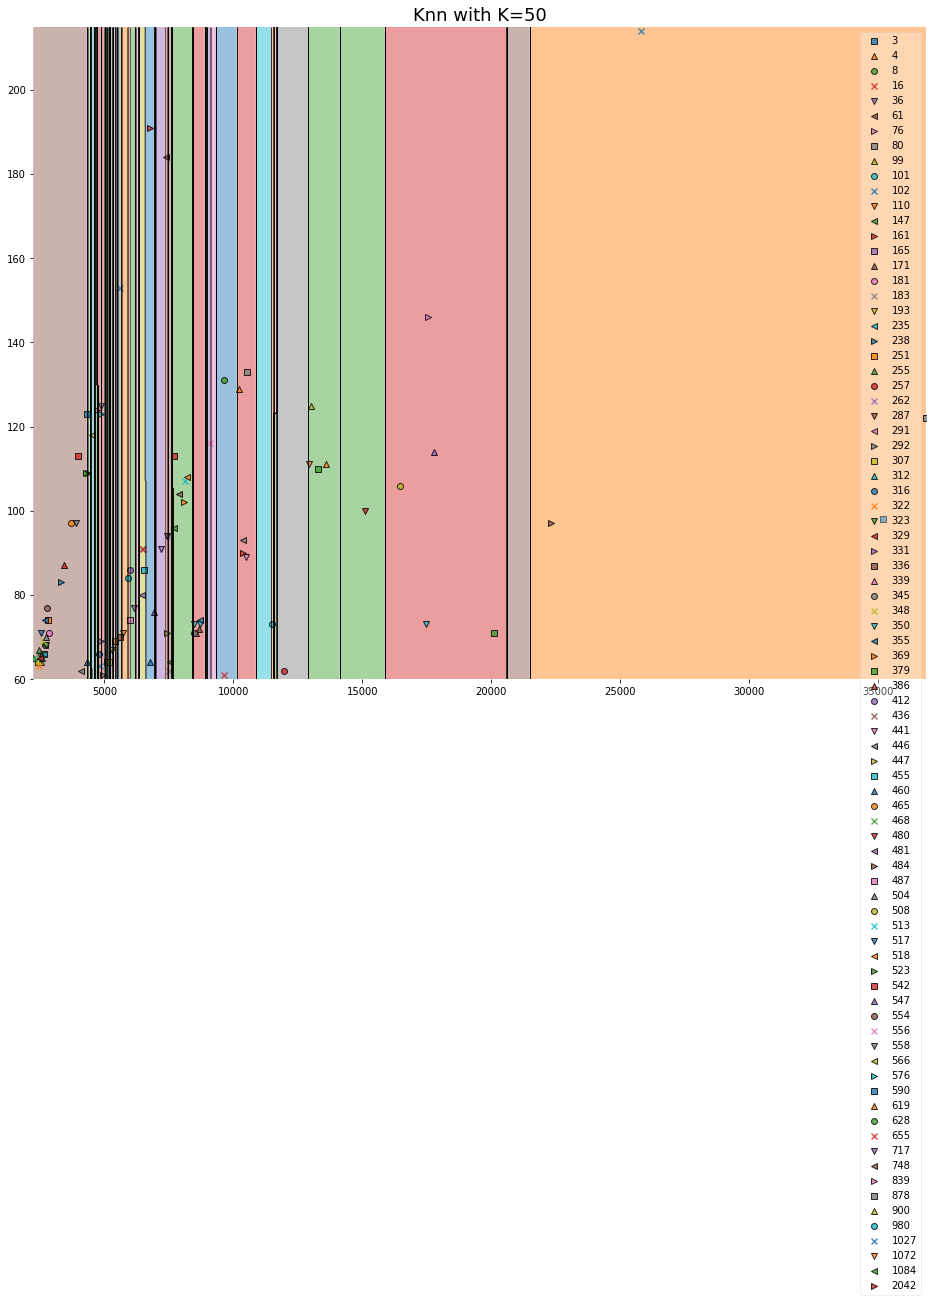

In [236]:
from mlxtend.plotting import plot_decision_regions

def knn_comparison(data, k):
    x = data.iloc[:, 0:2].values
    y = data.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(x, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show()

knn_comparison(df2, 50)